In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
import joblib

In [3]:
df = pd.read_csv(r"C:\Users\jbasn\OneDrive\Documents\winde_data_set\Data\Raw\winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

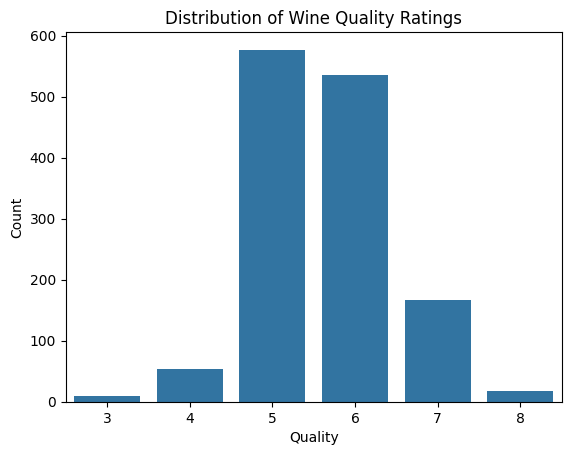

In [15]:
sns.countplot(x = df['quality'])
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality Ratings')
plt.show()

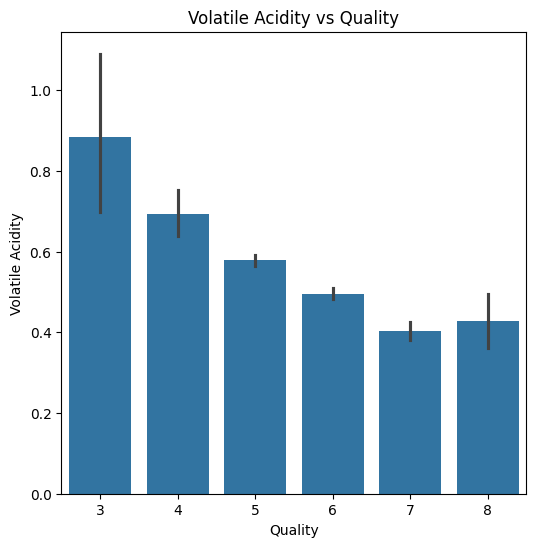

In [16]:
plot = plt.figure(figsize=(6,6))
sns.barplot(x =df['quality'] , y = df['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.title('Volatile Acidity vs Quality')
plt.show()

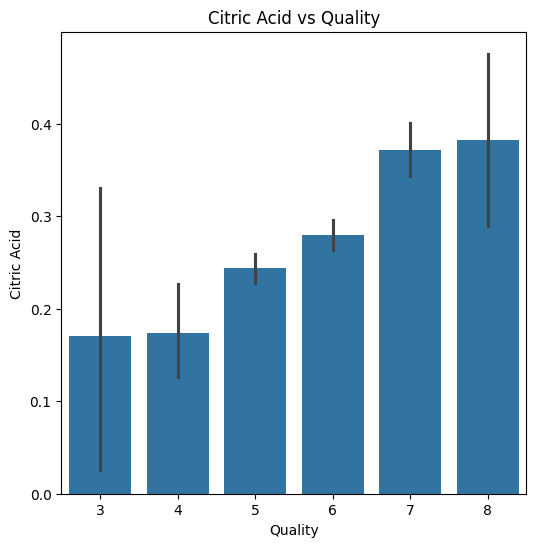

In [17]:
plot = plt.figure(figsize=(6,6))
sns.barplot(x = df['quality'] ,y = df['citric acid'])
plt.xlabel('Quality')
plt.ylabel('Citric Acid')
plt.title('Citric Acid vs Quality')
plt.show()

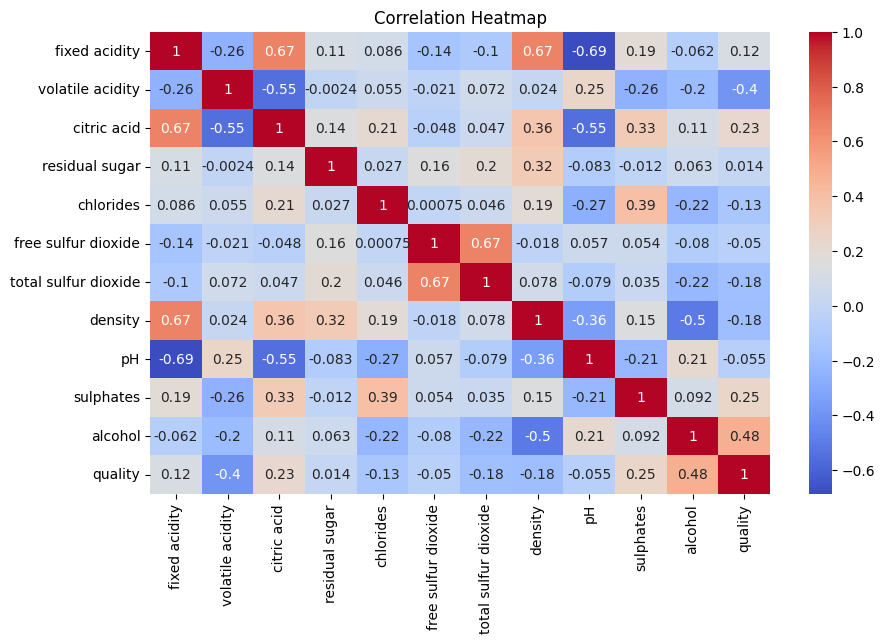

In [18]:
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
x = df.drop('quality', axis=1)
y = df['quality']

In [21]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [22]:
y

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64

In [23]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (1359, 11)
y shape: (1359,)


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")    
print(f"y_test shape: {y_test.shape}")

x_train shape: (1087, 11)
x_test shape: (272, 11)
y_train shape: (1087,)
y_test shape: (272,)


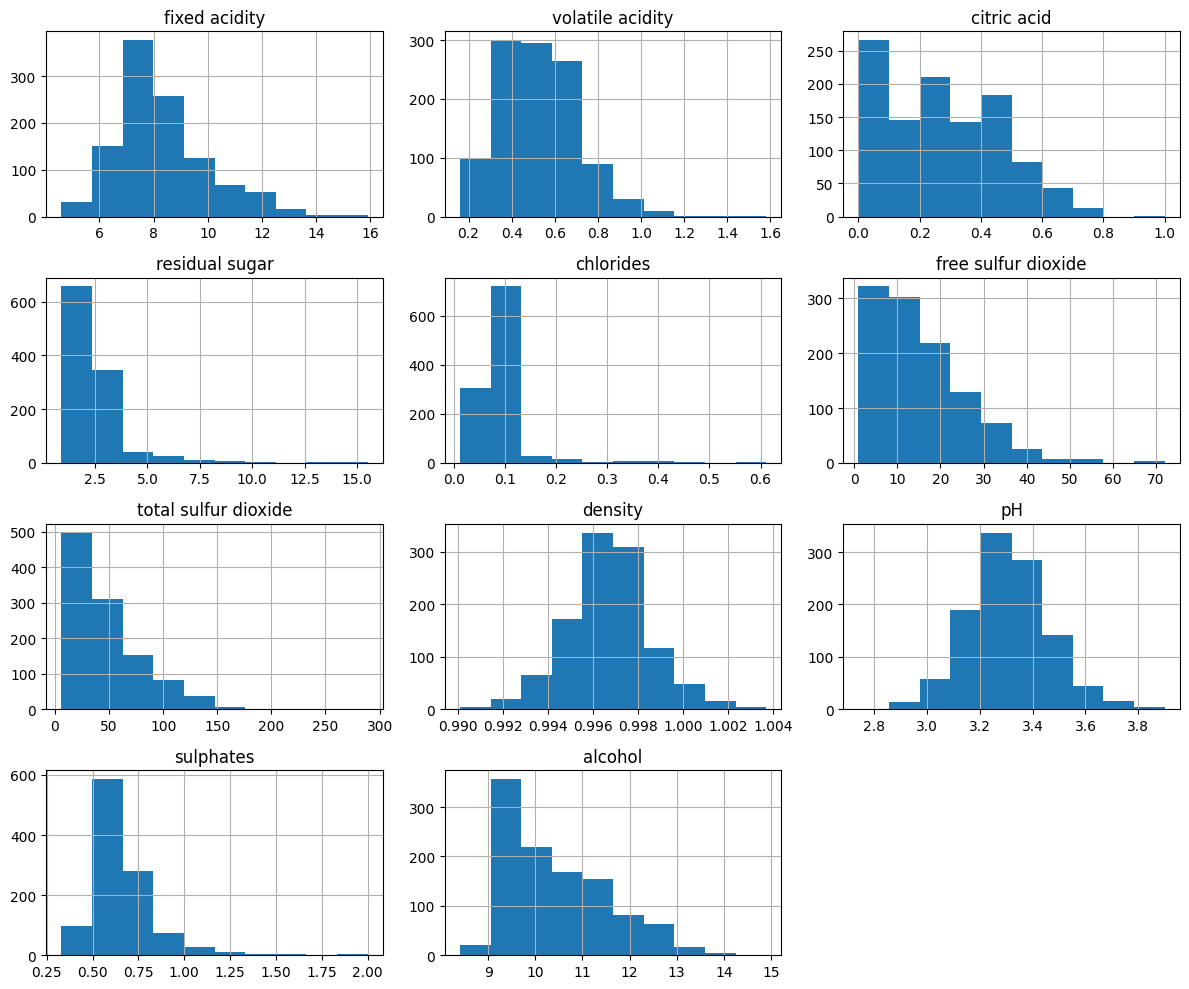

In [26]:
x_train.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

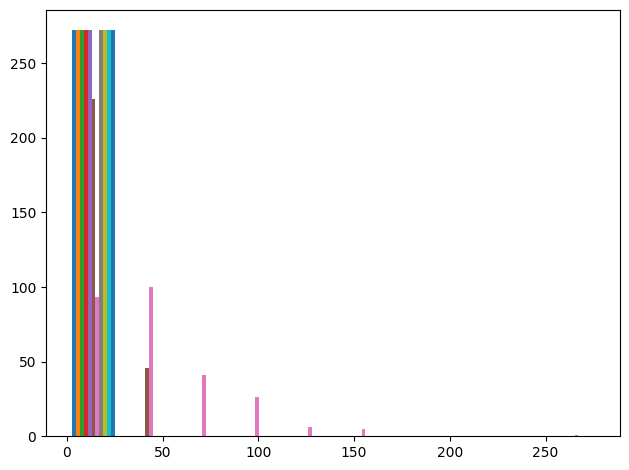

In [27]:
plt.hist(x_test,bins=10)
plt.tight_layout()
plt.show()

In [28]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
'''
k_neighbors = range(2,11,2)
training_accuracy = []
test_accuracy = []

for i in k_neighbors:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    training_accuracy.append(knn.score(x_train_scaled,y_train))
    test_accuracy.append(knn.score(x_test_scaled,y_test))

print("Training accuracy for different k values:", training_accuracy)
print("Test accuracy for different k values:", test_accuracy)
'''

Training accuracy for different k values: [0.7226662088745903, 0.5454234545091254, 0.4885190510636288, 0.44876901986969364, 0.4201902366355065]
Test accuracy for different k values: [0.23056080294617132, 0.2720819737821284, 0.3260018275760449, 0.33639113095578843, 0.3729265174499591]


In [45]:
k_neighbors = range(2,26)
cv_score = []   

for k in k_neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(
        knn,
        x_train_scaled,
        y_train,
        cv=5,
        scoring='r2',
    )
    cv_score.append(scores.mean())

best_k = k_neighbors[np.argmax(cv_score)]
print("Best k value:", best_k)
print("Best cross-validation score:", max(cv_score))

Best k value: 25
Best cross-validation score: 0.30236019537825864


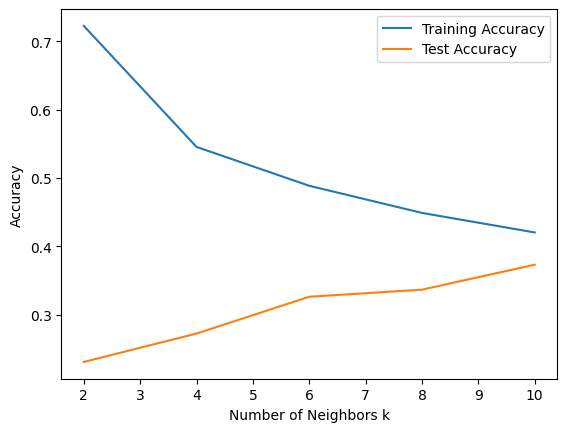

In [30]:
plt.plot(k_neighbors,training_accuracy,label='Training Accuracy')
plt.plot(k_neighbors,test_accuracy,label='Test Accuracy')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
model = KNeighborsRegressor(n_neighbors=24)
model.fit(x_train_scaled,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",24
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [32]:
y_pred = model.predict(x_test_scaled)

In [33]:
for i in range(2,25):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train_scaled,y_train)
    y_pred = model.predict(x_test_scaled)
    r2 = r2_score(y_test,y_pred)
    print(f'R^2 score for k={i}: {r2}')

R^2 score for k=2: 0.23056080294617132
R^2 score for k=3: 0.24339199810033862
R^2 score for k=4: 0.2720819737821284
R^2 score for k=5: 0.28251416795466255
R^2 score for k=6: 0.3260018275760449
R^2 score for k=7: 0.3324836259994868
R^2 score for k=8: 0.33639113095578843
R^2 score for k=9: 0.3602664048978472
R^2 score for k=10: 0.3729265174499591
R^2 score for k=11: 0.36555822537743765
R^2 score for k=12: 0.37267710208347915
R^2 score for k=13: 0.368491245636254
R^2 score for k=14: 0.36333322040247773
R^2 score for k=15: 0.3604355652234753
R^2 score for k=16: 0.36791721525750376
R^2 score for k=17: 0.37181270126689414
R^2 score for k=18: 0.3730815810817847
R^2 score for k=19: 0.3751983925938295
R^2 score for k=20: 0.36829431182857264
R^2 score for k=21: 0.36595477391826836
R^2 score for k=22: 0.36619090850742764
R^2 score for k=23: 0.3694806134752414
R^2 score for k=24: 0.3775248429493092


In [34]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 0.5193014705882353
Mean Squared Error: 0.44093392565359474
Root Mean Squared Error: 0.6640285578599724
R^2 Score: 0.3775248429493092


In [36]:
cld = RandomForestRegressor(random_state=42)


In [49]:
params = {
    'n_estimators': range(10,60,10),
    'max_depth': range(5,21,5),
}

In [52]:
grid = GridSearchCV(
    cld,
    param_grid = params,
    cv = 5,
    scoring='r2',
    n_jobs=-1
)
grid.fit(x_train,y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

print("Best Hyperparameters:", grid.best_params_)
print(f"RF RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"RF R2 Score: {r2_score(y_test,y_pred)}")
print(f"RF MAE: {mean_absolute_error(y_test,y_pred)}")


Best Hyperparameters: {'max_depth': 5, 'n_estimators': 30}
RF RMSE: 0.6160715863626163
RF R2 Score: 0.4641899353610097
RF MAE: 0.4716850441650767
